In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("DataFiles/Titanic_data.csv")


In [4]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.shape


(418, 12)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.dtypes.value_counts()


int64      5
object     5
float64    2
dtype: int64

In [8]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.nunique()


PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
print("Number of passengers : ",len(data))


Number of passengers :  418


In [11]:
print("% of passengers survived : " , round(342/891 * 100,2), "%")


% of passengers survived :  38.38 %


In [12]:
print("% of men who survived: ",round((len(data[(data['Survived'] == 1) & (data['Sex'] =='male')]) / len(data))* 100, 2), "%" )
print("% of women who survived: ",round((len(data[(data['Survived'] == 1) & (data['Sex'] =='female')]) / len(data))* 100, 2), "%" )

% of men who survived:  0.0 %
% of women who survived:  36.36 %


In [13]:
print("% of passengers who survived in 1st class: ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 1)]) / len(data)) * 100,2) ,"%")
print("% of passengers who survived in 2nd class: ",round((len(data[(data['Survived'] == 1) & (data['Pclass'] == 2)]) / len(data)) * 100,2) ,"%")
print("% of passengers who survived in 3rd class: ",round((len(data[(data['Survived'] ==1) & (data['Pclass'] == 3)]) / len(data)) * 100,2) ,"%")

% of passengers who survived in 1st class:  11.96 %
% of passengers who survived in 2nd class:  7.18 %
% of passengers who survived in 3rd class:  17.22 %


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

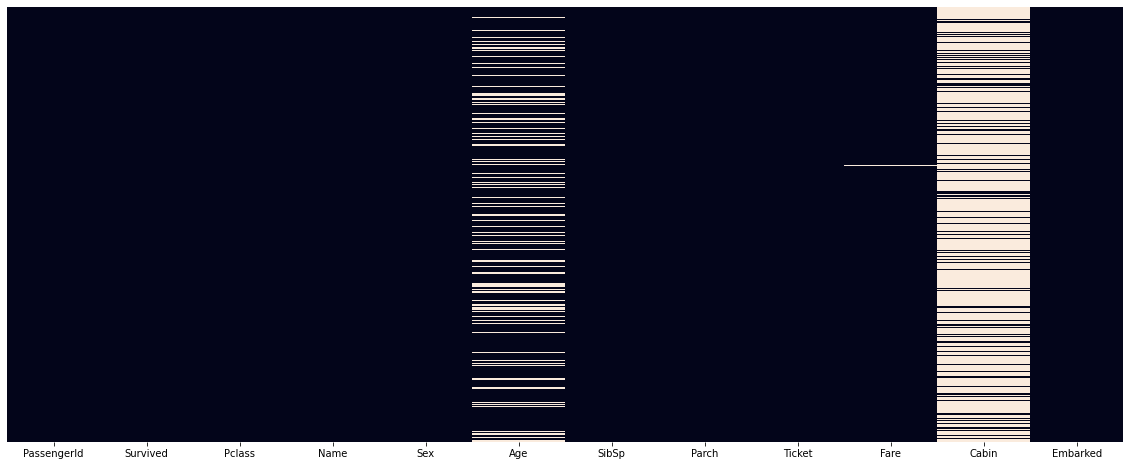

In [16]:
plt.figure(figsize =(20,8))
sns.heatmap(data.isnull() , yticklabels = False ,cbar= False);

In [17]:
pd.DataFrame(round((data.isnull().sum() / data.shape[0]) * 100,3), columns =['Missing%'])


,Missing%
PassengerId,0.000
Survived,0.000
Pclass,0.000
Name,0.000
Sex,0.000
Age,20.574
SibSp,0.000
Parch,0.000
Ticket,0.000
Fare,0.239


In [18]:
data= data.drop(['PassengerId','Name','Ticket'] , axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [20]:
data.drop('Cabin' , axis = 1,inplace = True)
data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [23]:
data.Embarked = data.Embarked.fillna(data['Embarked'].mode()[0])
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.head()


In [24]:
data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

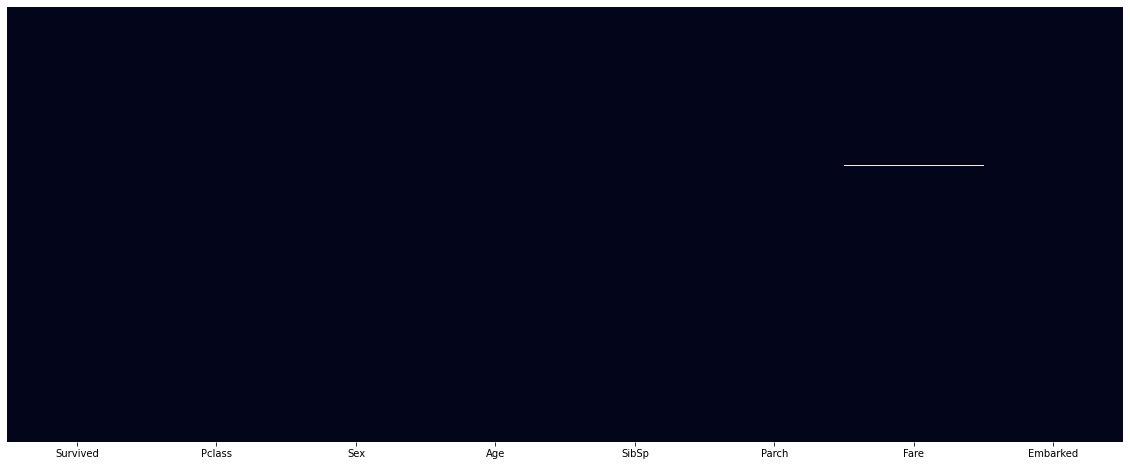

In [25]:
plt.figure(figsize = (20,8))
sns.heatmap(data.isnull() , yticklabels = False , cbar=False );

In [26]:
data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [28]:
data['Fare'] = data['Fare'].fillna(data['Age'].mean())

In [29]:
data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

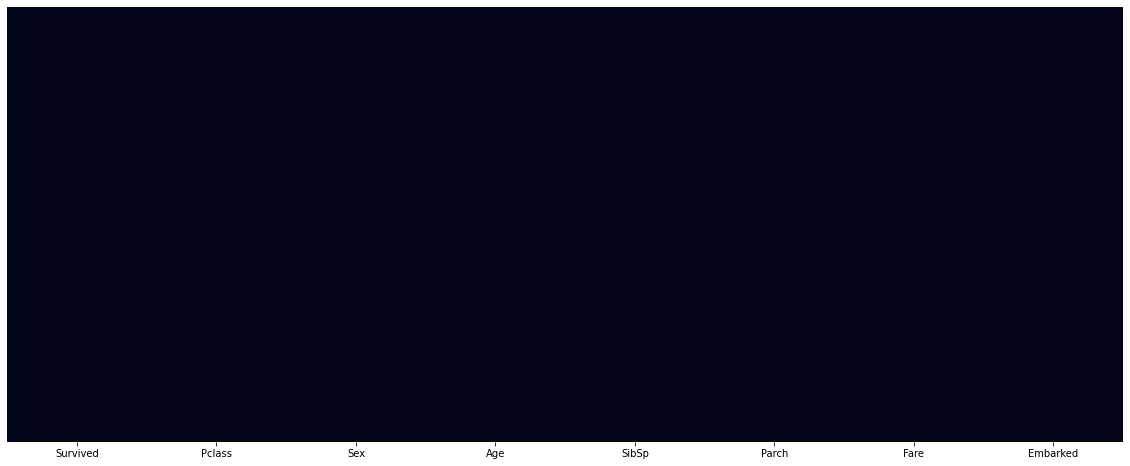

In [30]:
plt.figure(figsize = (20,8))
sns.heatmap(data.isnull() , yticklabels = False , cbar=False );

In [31]:
target = data['Survived']
target.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

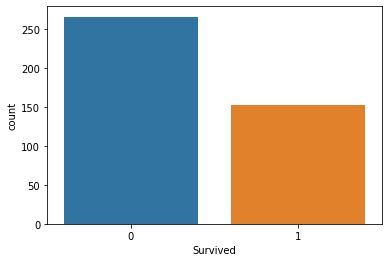

In [32]:
sns.countplot(x = 'Survived' , data=data)

In [33]:
x=data.drop('Survived' , axis =1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [34]:
x_cat = x.select_dtypes(include ="object")
x_cat.head()

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [35]:
x_cat.describe()

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


In [36]:
x_num = x.select_dtypes(exclude ="object")
x_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [37]:
x_num.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.614378
std,0.841838,12.634534,0.896760,0.981429,55.841115
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
x_cat_dum = pd.get_dummies(x_cat , drop_first = True)
x_cat_dum.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [39]:
new_data = pd.concat([x_num , x_cat_dum] , axis =1)
new_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [40]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(new_data , target, test_size =0.20 , random_state =42)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(84,)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

model1 = LogisticRegression(random_state = 42)
model2 = tree.DecisionTreeClassifier(criterion = 'entropy' , random_state =42)

model1.fit(x_train, y_train)
model2.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
y_predicted1 = model1.predict(x_test)
y_predicted1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [43]:
y_predicted2 = model2.predict(x_test)
y_predicted2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
print("Model1 Accuracy : " , accuracy_score(y_test , y_predicted1))
print("Model2 Accuracy : " , accuracy_score(y_test , y_predicted2))

Model1 Accuracy :  1.0
Model2 Accuracy :  1.0


In [45]:
from sklearn.metrics import confusion_matrix

print("Model1 Confusion Matrix :" )
cm1=confusion_matrix(y_test, y_predicted1)
cm1

Model1 Confusion Matrix :


array([[50,  0],
       [ 0, 34]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

print("Model2 Confusion Matrix :" )
cm2=confusion_matrix(y_test, y_predicted2)
cm2

Model2 Confusion Matrix :


array([[50,  0],
       [ 0, 34]], dtype=int64)

In [47]:
from sklearn.metrics import classification_report

print("Model Classification Report :")
print(classification_report(y_test, y_predicted1))

Model Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [48]:
from sklearn.metrics import classification_report

print("Model Classification Report :")
print(classification_report(y_test, y_predicted2))

Model Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

